In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
plt.style.use('seaborn')

# Neural Network

In [11]:
def softmax(a):
    exp_a=np.exp(a)
    return exp_a/np.sum(exp_a,axis=1,keepdims=True)

In [71]:
class NeuralNetwork:  
    #Function to initialise the network (initialising model parameters randomly)
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model={ } #dictionary to store model parameters
        #first Hidden layer
        model['w1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        #second hidden layer
        model['w2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        #output layer
        model['w3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        self.model=model
    def forward_propagation(self,x):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,w1)+b1
        a1=np.tanh(z1)

        z2=np.dot(a1,w2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,w3)+b3
        y_=softmax(z3)
        self.activation_outputs=(a1,a2,y_)
        return y_
    def backpropagation(self,x,y,learning_rate=0.001):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_=self.activation_outputs
        
        delta3= y_-y
        dw3= np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)
        
        delta2=(1-np.square(a2))*np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)
        
        delta1=(1-np.square(a1))*np.dot(delta2,w2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)
        
        self.model['w3']=self.model['w3']-learning_rate*dw3
        self.model['w2']=self.model['w2']-learning_rate*dw2
        self.model['w1']=self.model['w1']-learning_rate*dw1
        self.model['b3']=self.model['b3']-learning_rate*db3
        self.model['b2']=self.model['b2']-learning_rate*db2
        self.model['b1']=self.model['b1']-learning_rate*db1
    def predict(self,x):
        y_out=self.forward_propagation(x)
        return np.argmax(y_out,axis=1)
    def summary(self):
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,y_ = self.activation_outputs
        print("W1 ",w1.shape)
        print("A1 ",a1.shape)        
        print("W2 ",w2.shape)
        print("A2 ",a2.shape)
        print("W3 ",w3.shape)
        print("Y_ ",y_.shape)

In [72]:
def cal_loss(y_oht,p):
    l = np.mean((y_oht-p)**2)
    return l 
def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht
def train(x,y,model,learning_rate=0.001,epoch=1000,logs=True):
    loss=[]
    no_of_classes=len(np.unique(y))
    y_hot=one_hot(y,no_of_classes)
    for i in range(epoch):
        ypred=model.forward_propagation(x)
        model.backpropagation(x,y_hot,learning_rate)
        l=cal_loss(y_hot,ypred)
        loss.append(l)
        if(logs and i%100==0):
            print('epoch {} : loss = {}'.format(i,l))
    plt.plot(loss)
    plt.show()

# Load Dataset

In [73]:
from sklearn.datasets import make_classification
X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)

# Create model instance and Training

epoch 0 : loss = 0.23672714730520575
epoch 100 : loss = 0.029258362480646984
epoch 200 : loss = 0.028022313200399284
epoch 300 : loss = 0.02767760273986184
epoch 400 : loss = 0.027488611343768895
epoch 500 : loss = 0.02730693047330595
epoch 600 : loss = 0.027029757320921333
epoch 700 : loss = 0.02669268084824455
epoch 800 : loss = 0.02640505117167918
epoch 900 : loss = 0.026167901879101674


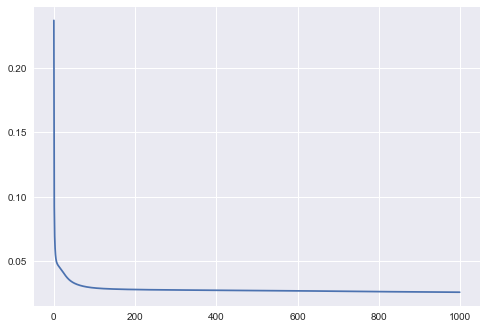

In [74]:
model=NeuralNetwork(2,[10,5],2)
train(X,Y,model)

# Summary 

In [77]:
model.summary()

W1  (2, 10)
A1  (713124, 10)
W2  (10, 5)
A2  (713124, 5)
W3  (5, 2)
Y_  (713124, 2)


# Visualize Descision Boundary

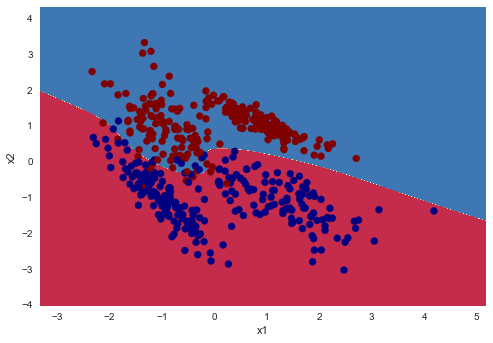

In [75]:
from visualize import plot_decision_boundary
plot_decision_boundary(lambda x:model.predict(x),X,Y)

# Accuracy

In [84]:
from sklearn.metrics import confusion_matrix
y_=model.predict(X)
cm=confusion_matrix(y_,Y)
print(cm)
print("Accuracy = ",100*(cm[0][0]+cm[1][1])/(np.sum(cm)))

[[242  11]
 [  8 239]]
Accuracy =  96.2
